# GAN Networks
by Manuel Herold

## Task 

Generate images of celebrities (CelebA dataset) via a GAN network. I will try to use a DE-GAN (https://arxiv.org/abs/1807.03923) while Alexander will use a different architecture to see which one suits the task better.

## Roadmap

1. Implement a VAE (Variational Autoencoder) to produce noise for the GAN
2. Run the network on the MNIST dataset as a proof of concept and to reproduce the results in the paper
3. Run the network on the CelebA dataset to generate the actual images of the main task

## Actual Course

1. Implemented a VAE (Variational Autoencoder) which maps MNIST images to a 2D latent space. See the notebook "VAE" for a detailed description.
2. Found out that they claimed to use a VAE in the paper but in Table 2 is a regular autoencoder described.
3. Implemented a regular autoencoder with the architecture stated in the paper and started training. The training failed (no real progress, loss got worse every iteration). I assume this happened because the paper stated what kind of layer they used, but all hyperparameters were missing.
4. Implemented a reference autoencoder that achieved a decent performance. It encodes the input images (784 pixels) to a latent space consisting of 100 pixels and decodes them back. The resconstructed images look a bit washed out but that is sufficient for the DE-GAN, as it "carries information of the real images" (Guoqiang Zhong et al).
5. Implemented the GAN network proposed in the paper but ran into similar problems as with the autoencoder in step 3.
6. Used the DCGAN implemented by Alexander Lercher as basic GAN architecture and tested it once with the regular normal distributed noise (N(0,I)) and once with the "structured" noise achieved with the autoencoder from step 4.

### Hypothesis

If the authors of the paper are correct, the DCGAN with noise from the autoencoder will perform better, than the DCGAN with noise from a normal distribution.

### Findings

The paper "Generative Adversarial Networks with Decoder-Encoder Output Noise" proposed a network architecture that was not able to reconstructed by just reading through the paper itself as all hyperparameters used were omitted. They proposed that they were using VAEs in order to generate a more structured noise which should then improve the convergence time from the later GAN. As the setup of the experiment was presented though, there was only a regular autoencoder used instead of a variational one. Additionally, the network architecture proposed did not work, the network was not able to pick up any information about the images whatsoever.

In an attempt to perform an alternative experiment to check on the effect of a more structured noise on a GAN network, I used the DCGAN of Alexander and compared the output of the training with regular normal distributed noise to the output with the noise created by the before mentioned regular autoencoder. The results were worse, the images were not recognizable after 50 epochs while the regular DCGAN produced clear images after 50 epochs. Therefore, the effort of training an additional autoencoder is not worth as normal distributed noise is sufficient in achieving the desired outcome for this task.

### Other Notebooks

- reports/herold/VAE.ipynb ... implementation and explanation of variational autoencoders (VAE)
- reports/herold/AE-DEGAN.ipynb ... implementation and explanation of the autoencoder proposed in the paper
- reports/herold/DEGAN-2.ipynb ... implementation and explanation of a regular autoencoder and usage of the produced noise on the DCGAN of Alexander


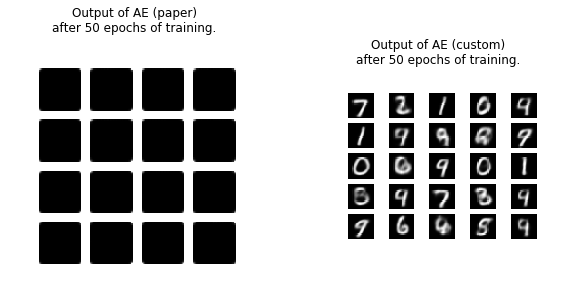

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, 2, figsize=(10,20))

img = mpimg.imread('reports/herold/ae_paper_epoch_50.png')
ax[0].imshow(img)
ax[0].set_title("Output of AE (paper)\nafter 50 epochs of training.")
ax[0].axis("off")

img = mpimg.imread('reports/herold/ae_custom_epoch_50.png')
ax[1].imshow(img)
ax[1].set_title("Output of AE (custom)\nafter 50 epochs of training.")
ax[1].axis("off")
pass

The output of the autoencoder which is proposed in the paper can be seen in the first image above. There are no features of the MNIST digits visible, the encoder did not pick up any information whatsoever.

On the right is a simple autoencoder I found online. It trained for 50 epochs as well and was finished after around 30 minutes. Even though not perfect, it is able to reconstruct the numbers to a good degree that they are recognizable.

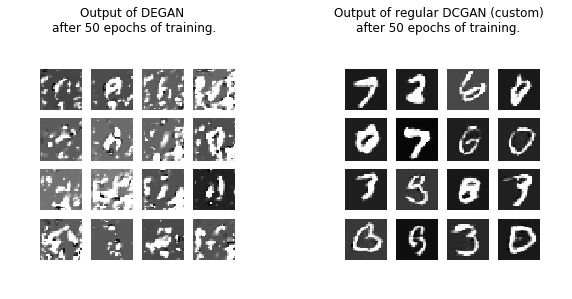

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, 2, figsize=(10,20))

img = mpimg.imread('reports/herold/degan_epoch_50.png')
ax[0].imshow(img)
ax[0].set_title("Output of DEGAN \nafter 50 epochs of training.")
ax[0].axis("off")

img = mpimg.imread('reports/herold/dcgan_epoch_50.png')
ax[1].imshow(img)
ax[1].set_title("Output of regular DCGAN (custom)\nafter 50 epochs of training.")
ax[1].axis("off")
pass